# **Clustering Analysis of Mall Customer Data**

## **Overview**
This notebook explores clustering techniques, specifically K-Means and DBSCAN, on the Mall Customer dataset. The process involves data loading, cleaning, initial visualization, applying clustering algorithms, and analyzing cluster characteristics.

## Notebook Structure

*   [**Library Imports and Environment Setup**](#library-imports-and-environment-setup): Imports necessary libraries and sets up the environment.
*   [**Load Mall Customer Dataset**](#load-mall-customer-dataset): Loads and initially inspects the customer data.
*   [**Mall Customer Data Cleaning**](#mall-customer-data-cleaning): Preprocesses the data by removing irrelevant features.
*   [**Initial Scatter Plot of Customer Data**](#initial-scatter-plot-of-customer-data): Visualizes the raw data distribution.
*   [**K-Means Clustering on Mall Customers**](#k-means-clustering-on-mall-customers): Applies K-Means and visualizes the results.
*   [**K-Means with Custom Initialization (Multiple Runs)**](#k-means-with-custom-initialization-multiple-runs): Experimenting with different initial centroids for K-Means.
*   [**Analyze average spending per cluster**](#analyze-average-spending-per-cluster): Analyzing the characteristics of the K-Means clusters.
*   [**Bonus Task using DBSCAN**](#bonus-task-using-dbscan): Introduces the DBSCAN clustering method.
    *   [**Load DataSet (DBSCAN)**](#load-dataset-dbscan): Loads the data for DBSCAN (re-using the cleaned data).
    *   [**Scale Data (DBSCAN)**](#scale-data-dbscan): Scales the data for DBSCAN.
    *   [**Implement DBSCAN**](#implement-dbscan): Applies DBSCAN with initial parameters.
    *   [**Implement DBSCAN with elbow method**](#implement-dbscan-with-elbow-method): Uses the elbow method to help determine DBSCAN parameters.
    *   [**Visualize Elbow Method for DBSCAN**](#visualize-elbow-method-for-dbscan): Visualizes the results of the elbow method.
    *   [**DBSCAN Clustering with Varying Epsilon Values**](#dbscan-clustering-with-varying-epsilon-values): Explores the effect of different epsilon values on DBSCAN.
    *   [**DBSCAN Clustering with Varying {Min_Samples} but fixed {Epsilon Values}**](#dbscan-clustering-with-varying-min_samples-but-fixed-epsilon-values): Explores the effect of different min_samples values on DBSCAN.
    *   [**Visualizing DBSCAN Clusters with Pair Plot**](#visualizing-dbscan-clusters-with-pair-plot): Visualizes the DBSCAN clusters using a pair plot.
    *   [**Reverse Scale to visualize**](#reverse-scale-to-visualize): Reverses the scaling for visualization.
    *   [**Visualize DBSCAN averages**](#visualize-dbscan-averages): Analyzes the characteristics of the DBSCAN clusters.
    *   [**Helper Functions**](#helper-functions): Contains reusable functions for plotting and centroid initialization.

##  
  
# **Library Imports and Environment Setup**  
This cell imports essential libraries for data manipulation, visualization, clustering, and preprocessing. It also mounts Google Drive to access external datasets and enables inline plotting for visual outputs in Colab.


In [34]:
import sys
import os

from google.colab import drive
drive.mount('/content/drive')

# Replace '/path/to/your/utils_folder' with the actual path to your folder in Google Drive
utils_folder_path = '/content/drive/My Drive/Machine Learning/'

# Add the folder to the Python path
if os.path.exists(utils_folder_path):
    sys.path.append(utils_folder_path)
    print(f"Added {utils_folder_path} to Python path.")
else:
    print(f"Error: Folder not found at {utils_folder_path}. Please check the path.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Added /content/drive/My Drive/Machine Learning/ to Python path.


In [35]:
# Import Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn for enhanced visualizations

from sklearn.cluster import KMeans, DBSCAN # Import DBSCAN here
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Import specific functions from utils.py
from utils import plot_clusters, kMeans_init_centroids,plot_cluster_averages

%matplotlib inline

##  
  
# **Load Mall Customer Dataset**  
This cell reads the Mall Customers dataset from Google Drive into a pandas DataFrame and displays the first few rows to preview its structure and contents.


In [36]:
# Corrected file path after mounting Google Drive
customers_file_path = '/content/drive/MyDrive/Machine Learning/Mall_Customers.csv'
train_data = pd.read_csv(customers_file_path)
train_data.head()



,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [37]:
print(train_data.shape)

(200, 5)


##  
  
# **Mall Customer Data Cleaning**  
This cell defines a cleaning function that removes non-essential columns (`CustomerID`, `Genre`, and `Age`) from the dataset to focus on features relevant for clustering. It then applies the function and previews the cleaned data.


In [38]:
def clean(data):
  data = data.drop(['CustomerID','Genre','Age'], axis=1)
  return data

train_data_clean = clean(train_data)
train_data_clean.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


##  
  
# **Initial Scatter Plot of Customer Data**  
This cell creates a scatter plot of spending score vs. annual income using blue "x" markers. It provides a visual overview of customer distribution, useful for identifying potential clusters before applying unsupervised learning. Scaling is prepared but commented out for now.


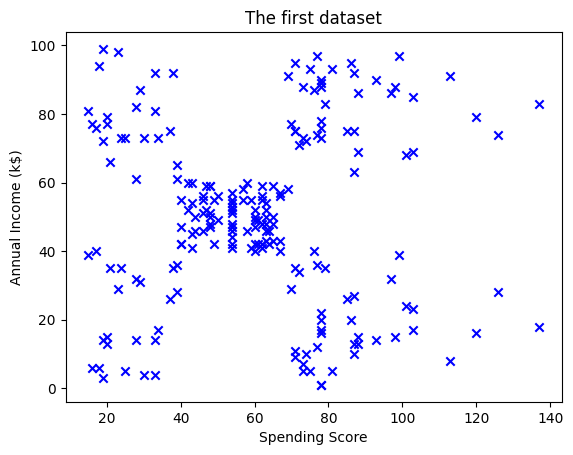

In [39]:
# Create a scatter plot of the data. To change the markers to blue "x",
# we used the 'marker' and 'c' parameters
spending_scaler = StandardScaler()
# train_data_clean['Spending Score (1-100)'] = spending_scaler.fit_transform(train_data_clean[['Spending Score (1-100)']])

annual_scaler = StandardScaler()
# train_data_clean['Annual Income (k$)'] = annual_scaler.fit_transform(train_data_clean[['Annual Income (k$)']])

plt.scatter(train_data_clean.iloc[:, 0], train_data_clean.iloc[:, 1], marker='x', c='b')

# Set the title
plt.title("The first dataset")
# Set the y-axis label
plt.ylabel('Annual Income (k$)')
# Set the x-axis label
plt.xlabel('Spending Score')
# Set axis range
# plt.axis([0, 1, 0, 140])
plt.show()

##  
  
# **K-Means Clustering on Mall Customers**  
This cell applies K-Means clustering with 5 clusters to the cleaned customer data. It predicts cluster assignments, extracts cluster centroids, and visualizes the segmented groups using a custom plotting function.


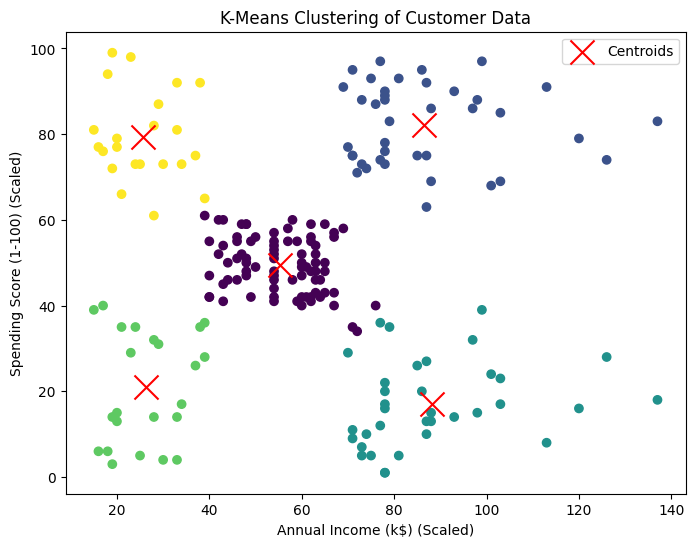

In [40]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(train_data_clean)
predictions = kmeans.predict(train_data_clean)
centroids = kmeans.cluster_centers_
plot_clusters(train_data_clean, predictions, centroids)


##  
  
# **K-Means with Custom Initialization (Multiple Runs)**  
This cell runs K-Means clustering five times using randomly selected initial centroids. Each iteration visualizes the resulting clusters, helping assess how initialization affects convergence and cluster formation.


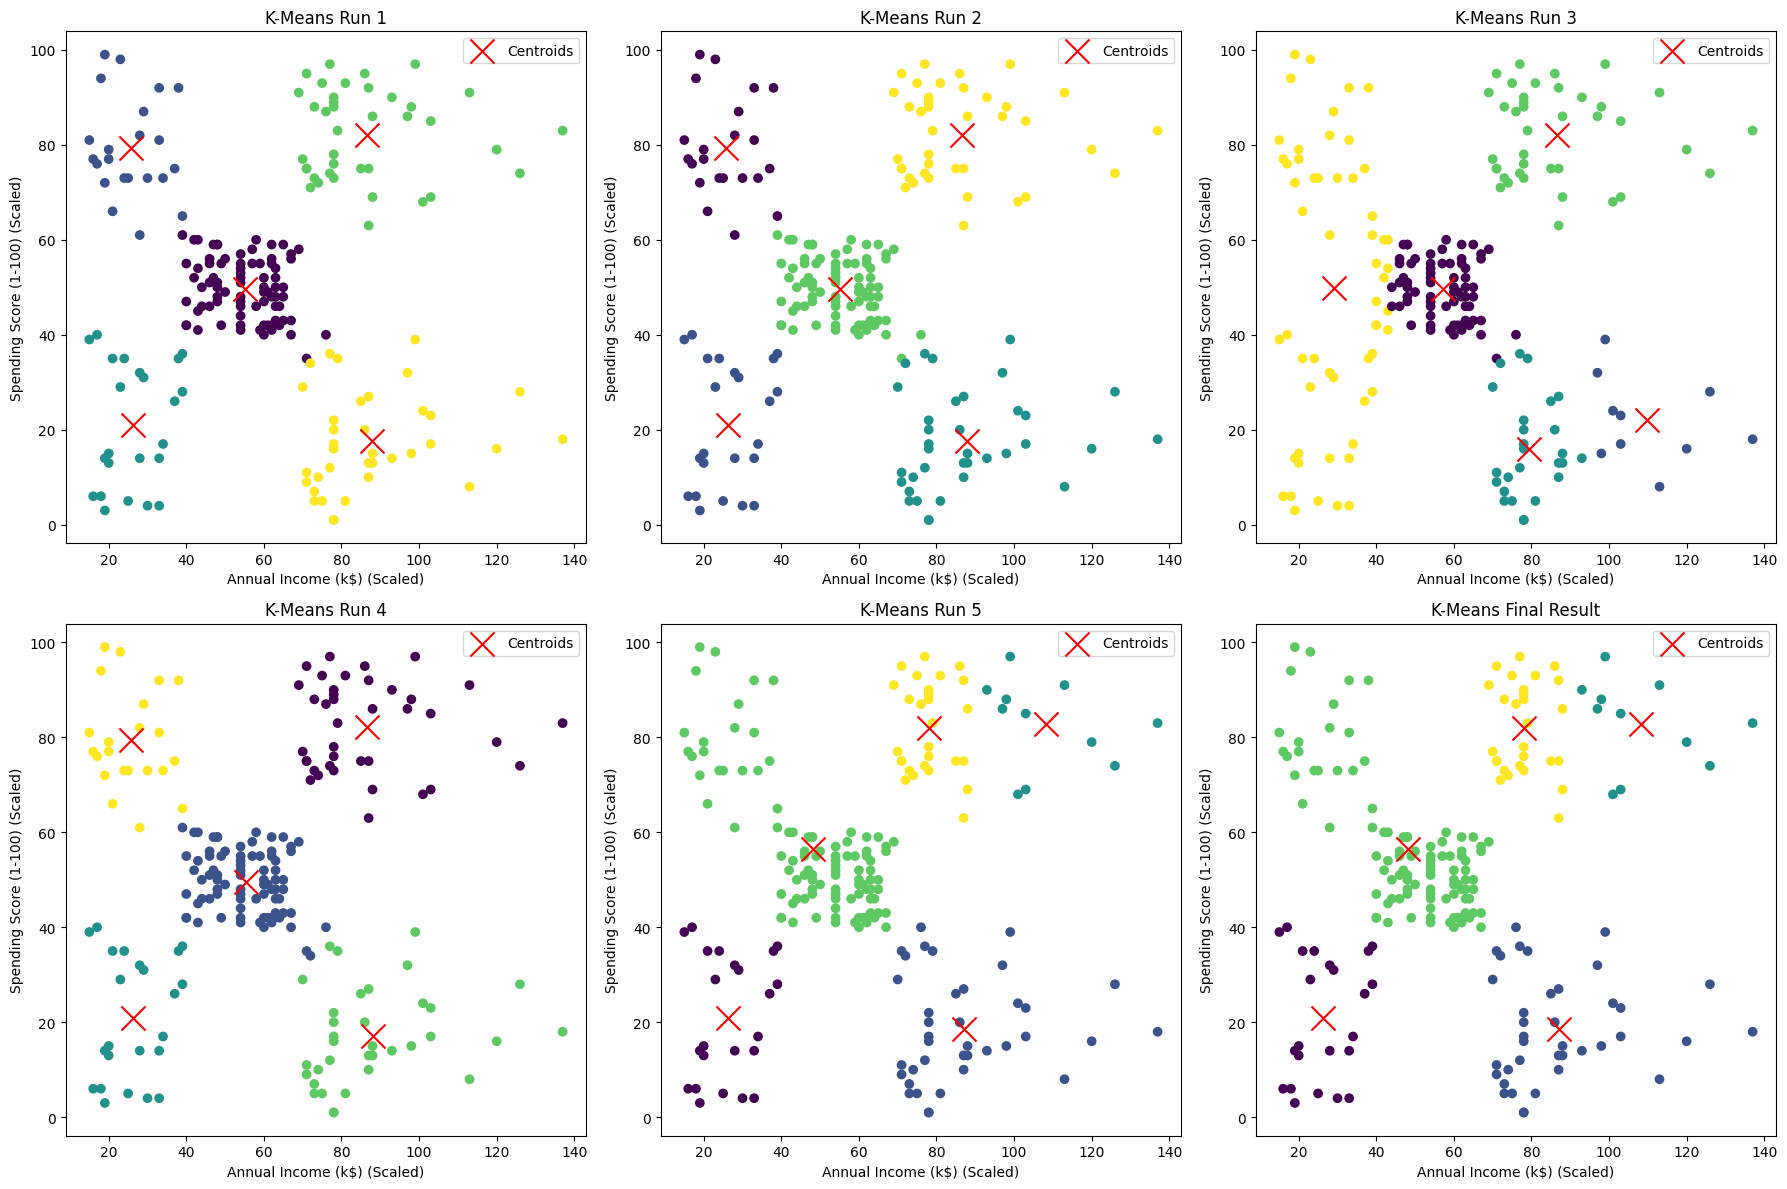

In [41]:
# Run this cell repeatedly to see different outcomes.
centroids_list = [] # Initialize centroids_list outside the loop

# Set up the figure grid for 6 subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i in range(5):
  # Set number of centroids and max number of iterations
  K = 5
  max_iters = 10

  # Set initial centroids by picking random examples from the dataset
  initial_centroids = kMeans_init_centroids(train_data_clean, K)

  # Convert initial_centroids to a NumPy array
  initial_centroids_np = initial_centroids.values

  # Run K-Means
  kmeans = KMeans(n_clusters=K, init=initial_centroids_np, max_iter=max_iters, random_state=0).fit(train_data_clean)
  predictions = kmeans.predict(train_data_clean)
  centroids = kmeans.cluster_centers_
  centroids_list.append(centroids) # Append centroids in each iteration

  # Plot on the current subplot
  axes[i].scatter(train_data_clean.iloc[:, 0], train_data_clean.iloc[:, 1], c=predictions, cmap='viridis', marker='o')
  axes[i].scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='x', label='Centroids')
  axes[i].set_title(f'K-Means Run {i + 1}')
  axes[i].set_xlabel('Annual Income (k$) (Scaled)')
  axes[i].set_ylabel('Spending Score (1-100) (Scaled)')
  axes[i].legend()

# Plot the final result from the last run in the 6th subplot
axes[5].scatter(train_data_clean.iloc[:, 0], train_data_clean.iloc[:, 1], c=predictions, cmap='viridis', marker='o')
axes[5].scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='x', label='Centroids')
axes[5].set_title('K-Means Final Result')
axes[5].set_xlabel('Annual Income (k$) (Scaled)')
axes[5].set_ylabel('Spending Score (1-100) (Scaled)')
axes[5].legend()


plt.tight_layout()
plt.show()

#**Bonus Task : "Analyze average spending per cluster"**

  
## **Extracting Cluster Averages**  
This cell retrieves the average annual income and spending score for each cluster from the final K-Means model run. These centroid values help interpret customer segments and guide business decisions based on income and spending behavior.


In [42]:
# Extract final centroids
# Access the last element of centroids_list for the final centroids
key = 2
final_centroids = centroids_list[key - 1]


# Create a DataFrame to display cluster averages
cluster_summary_kmeans = pd.DataFrame({
    'Cluster': [f'Cluster {i+1}' for i in range(final_centroids.shape[0])],
    'Average Annual Income (k$)': final_centroids[:, 0],
    'Average Spending Score': final_centroids[:, 1]
})

# Display the table
print(cluster_summary_kmeans)

     Cluster  Average Annual Income (k$)  Average Spending Score
0  Cluster 1                   25.727273               79.363636
1  Cluster 2                   26.304348               20.913043
2  Cluster 3                   87.750000               17.583333
3  Cluster 4                   55.087500               49.712500
4  Cluster 5                   86.538462               82.128205


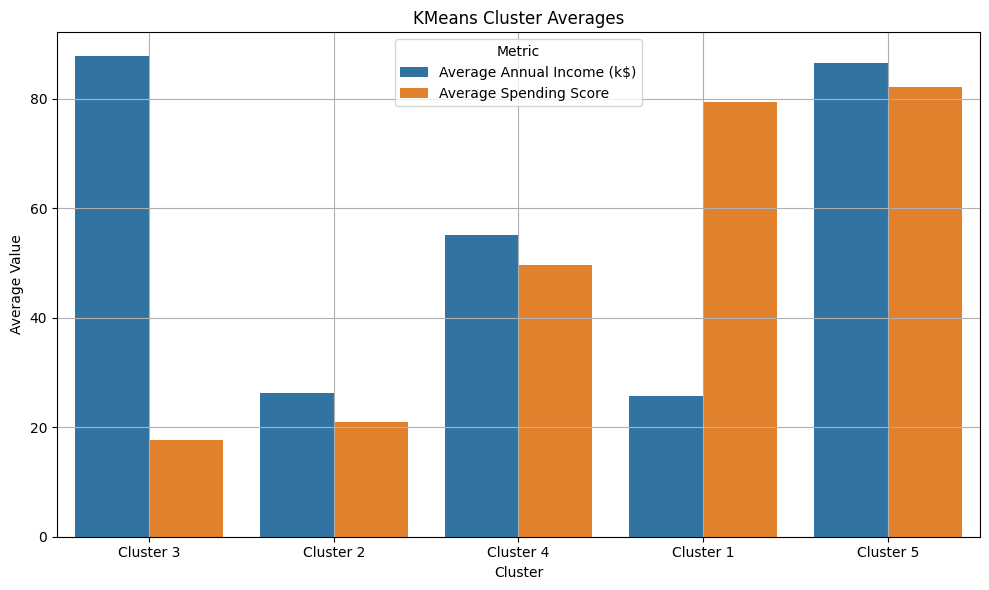

In [43]:
plot_cluster_averages(cluster_summary_kmeans, "KMeans")

#**Bonus Task using DBSCAN**
  




In [44]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import load_iris

#**Load DataSet**

In [45]:
# iris = load_iris()
df = clean(train_data)
# df.columns = [x[0].strip(" (cm)") for x in df.columns]
display(df.head())

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


#**Scale Data**

In [46]:
scalers = []

for col in df.columns:
  scaler = StandardScaler()
  df[col] = scaler.fit_transform(df[[col]])
  scalers.append(scaler)
display(df.head())

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


#**Implement DBSCAN**

In [47]:
min_samples = 2*df.shape[1]
dbscan = DBSCAN(eps=0.5, min_samples=min_samples)
clusters = dbscan.fit_predict(df)
print("clusters created" + str(list(set(clusters))))

clusters created[np.int64(0), np.int64(1), np.int64(-1)]


#**Implement DBSCAN with elbow method**

In [48]:
k = min_samples if min_samples > 2 else 2
nbrs = NearestNeighbors(n_neighbors=k).fit(df)
distances, indices = nbrs.kneighbors(df)
distances = np.sort(distances[:,k-1], axis=0)

print("min samples: " +  str(min_samples))
for enum, row in enumerate(distances[:5]):
  print("observation " + str(enum) +":" + str(round(row,2)))


min samples: 4
observation 0:0.05
observation 1:0.05
observation 2:0.05
observation 3:0.08
observation 4:0.08


In [49]:
# df['k_nearest_distance'] = distances
display(df.head())

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


# **Visualize Elbow Method for DBSCAN**
This cell generates a plot of the sorted distances to the k-th nearest neighbor. This plot, known as the elbow plot, helps in selecting an appropriate `eps` value for DBSCAN clustering. The point where the curve sharply bends (the "elbow") is often a good choice for `eps`.

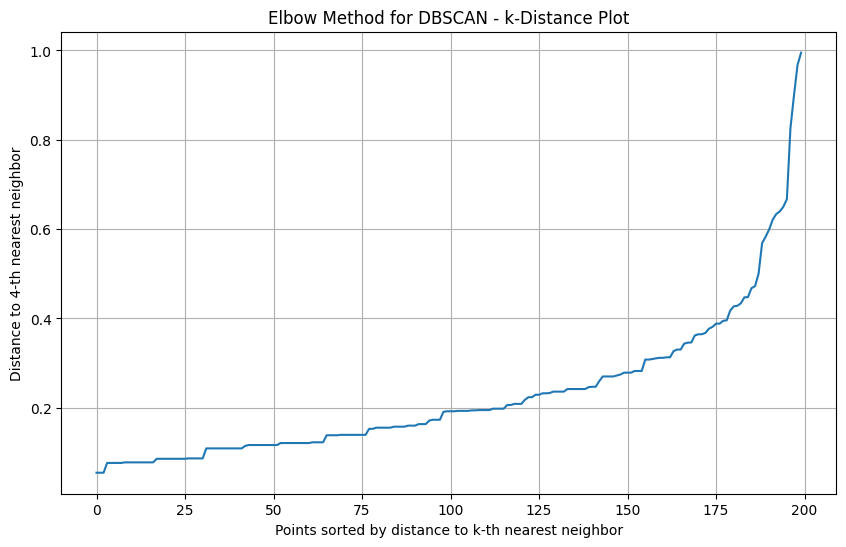

In [50]:
plt.figure(figsize=(10, 6)) # Increase figure size for better visibility
plt.plot(distances)
plt.title('Elbow Method for DBSCAN - k-Distance Plot') # Add a title
plt.xlabel('Points sorted by distance to k-th nearest neighbor') # More descriptive x-label
plt.ylabel(f'Distance to {k}-th nearest neighbor') # More descriptive y-label
plt.grid(True) # Add a grid for easier reading
plt.show()

##

# **DBSCAN Clustering with Varying Epsilon Values**
This cell applies DBSCAN clustering to customer data using a fixed min_samples value and iterates over multiple eps values to explore how neighborhood radius affects cluster formation. For each configuration, it prints the number of points assigned to each cluster, helping assess sensitivity and optimal settings.


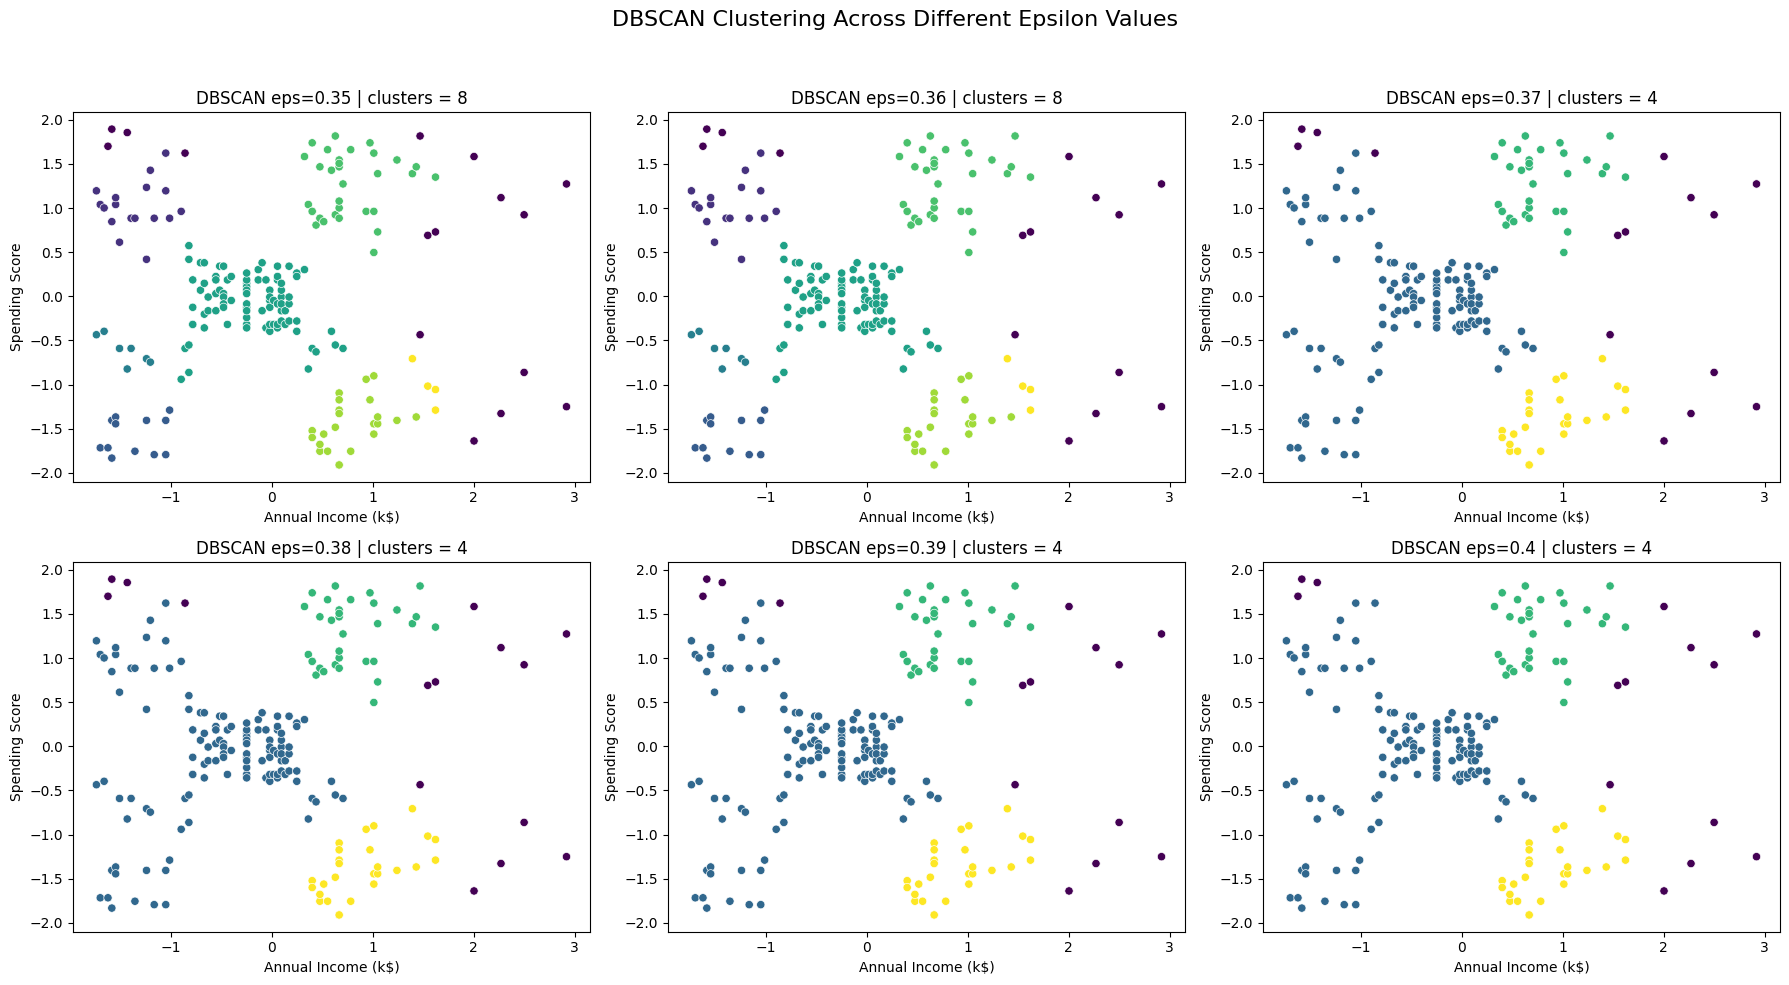

In [51]:
min_samples = 4
features = ['Annual Income (k$)', 'Spending Score (1-100)']

# Set up the figure grid
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Iterate over epsilon values and plot results
for idx, eps in enumerate([0.35, 0.36, 0.37, 0.38, 0.39, 0.4]):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    df['cluster'] = dbscan.fit_predict(df[features])
    count = df.cluster.nunique()

    sns.scatterplot(
        data=df,
        x=features[0],
        y=features[1],
        hue='cluster',
        palette='viridis',
        ax=axes[idx],
        legend=False
    )

    axes[idx].set_title(f'DBSCAN eps={eps} | clusters = {count}')
    axes[idx].set_xlabel('Annual Income (k$)')
    axes[idx].set_ylabel('Spending Score')

plt.suptitle('DBSCAN Clustering Across Different Epsilon Values', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# **DBSCAN Clustering with Varying {Min_Samples} but fixed {Epsilon Values}**


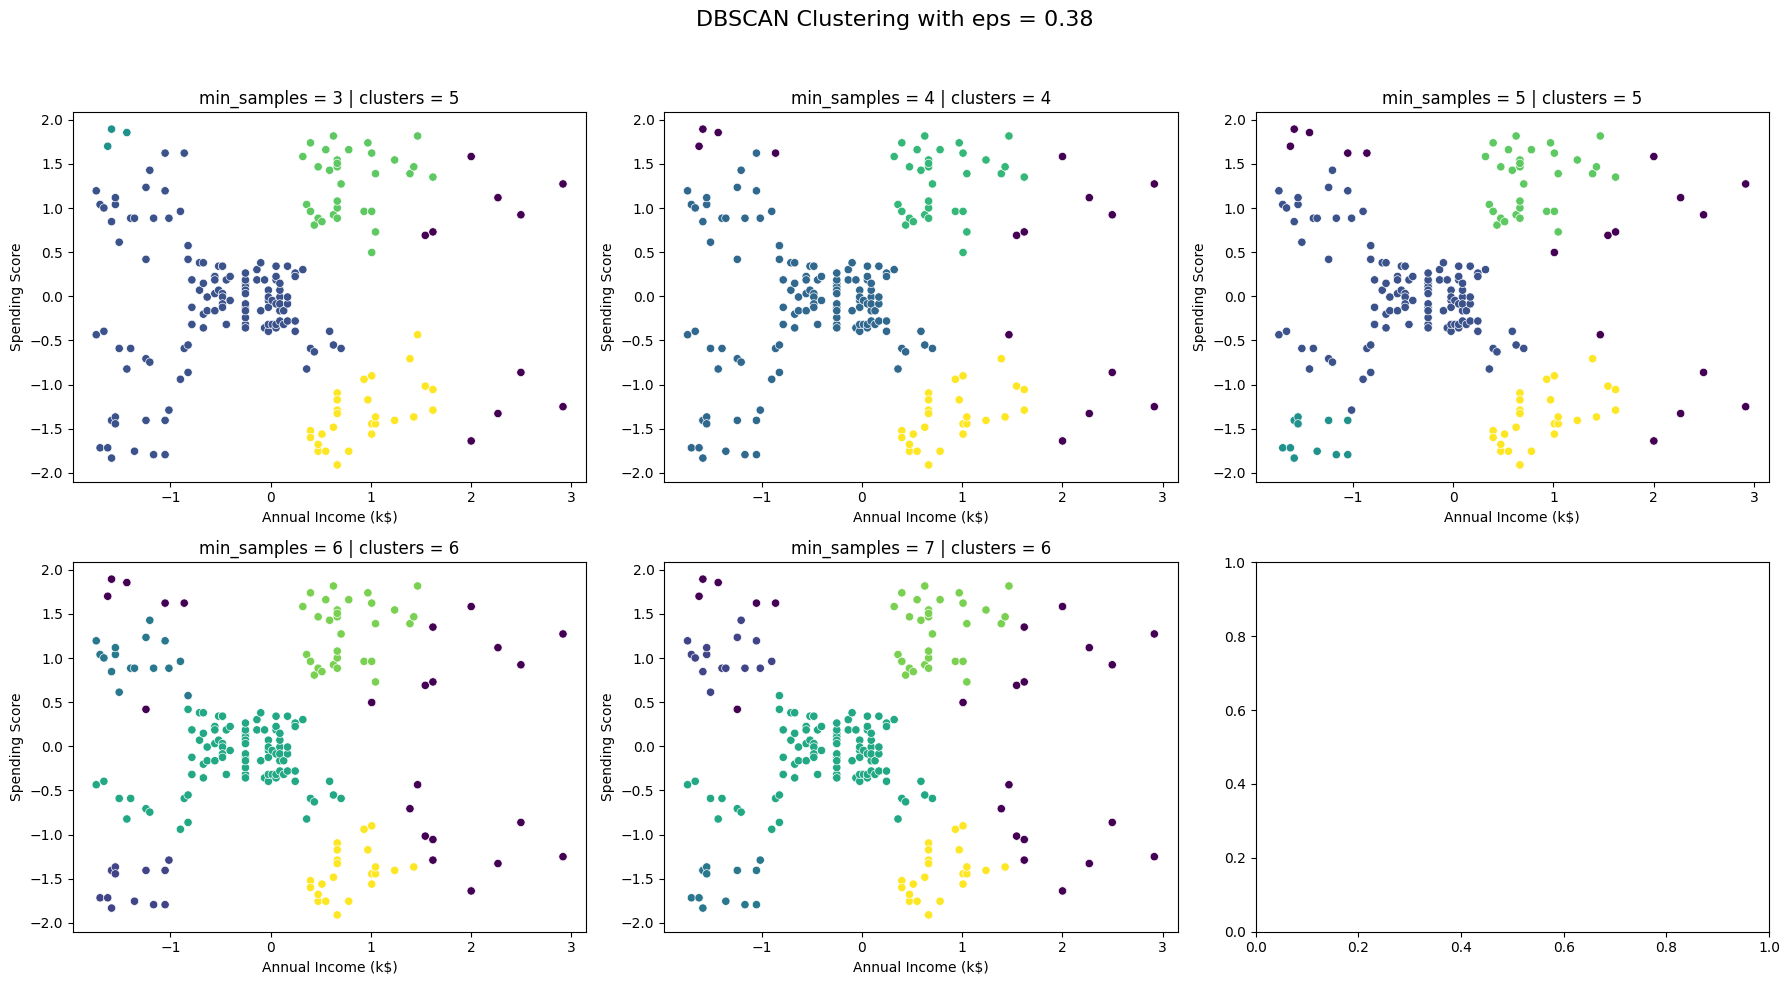

In [52]:
eps = 0.38  # Fixed epsilon value
min_samples_list = [3, 4,5,6,7]
features = ['Annual Income (k$)', 'Spending Score (1-100)']

# Set up the figure grid
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Iterate over different min_samples values
for idx, min_samples in enumerate(min_samples_list):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    df['cluster'] = dbscan.fit_predict(df[features])
    count = df.cluster.nunique()

    sns.scatterplot(
        data=df,
        x=features[0],
        y=features[1],
        hue='cluster',
        palette='viridis',
        ax=axes[idx],
        legend=False
    )

    axes[idx].set_title(f'min_samples = {min_samples} | clusters = {count}')
    axes[idx].set_xlabel('Annual Income (k$)')
    axes[idx].set_ylabel('Spending Score')

plt.suptitle(f'DBSCAN Clustering with eps = {eps}', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


##  
  
# **Visualizing DBSCAN Clusters with Pair Plot**  
This cell adds DBSCAN cluster labels to the DataFrame and uses Seaborn’s `pairplot` to visualize relationships between annual income and spending score, colored by cluster assignment. The plot helps assess how well DBSCAN has separated customer groups based on density.


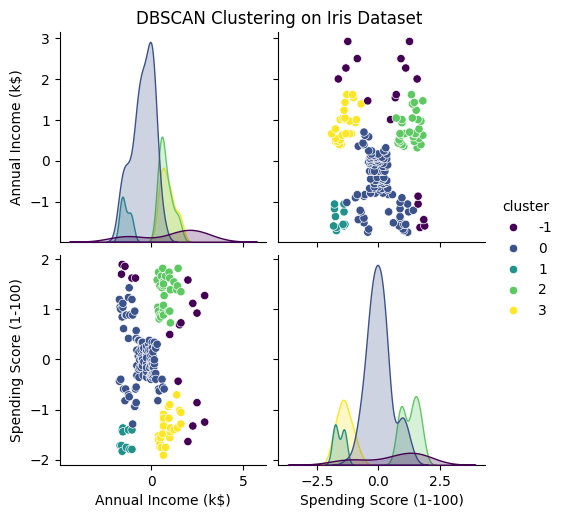

In [53]:
# Add the cluster labels to the DataFrame
dbscan = DBSCAN(eps=0.38, min_samples=5)
df['cluster'] = dbscan.fit_predict(df[features])

# Create a pair plot, coloring points by the 'cluster' column
sns.pairplot(df[['Annual Income (k$)', 'Spending Score (1-100)','cluster']], hue='cluster', palette='viridis')
plt.suptitle('DBSCAN Clustering on Iris Dataset', y=1.02) # Add a title
plt.show()

# **Reverse Scale to visualize**

In [54]:
# Reverse scaling for the first two columns
for col in df.columns[:2]:
    scaler = scalers[df.columns.get_loc(col)]
    df[col] = scaler.inverse_transform(df[[col]])

# Display the updated DataFrame
display(df.head())

,Annual Income (k$),Spending Score (1-100),cluster
0,15.0,39.0,0
1,15.0,81.0,0
2,16.0,6.0,1
3,16.0,77.0,0
4,17.0,40.0,0


# **Visualize DBSCAN averages**

In [55]:
# Calculate and display cluster averages for DBSCAN results
cluster_summary_dbscan = df.groupby('cluster')[features].mean().reset_index()
cluster_summary_dbscan.columns = ['Cluster', 'Average Annual Income (k$)', 'Average Spending Score']

# Display the table
print("DBSCAN Cluster Averages:")
print(cluster_summary_dbscan)

DBSCAN Cluster Averages:
   Cluster  Average Annual Income (k$)  Average Spending Score
0       -1                   89.000000               65.352941
1        0                   48.530973               51.017699
2        1                   23.727273                8.909091
3        2                   80.875000               83.625000
4        3                   83.925926               14.444444


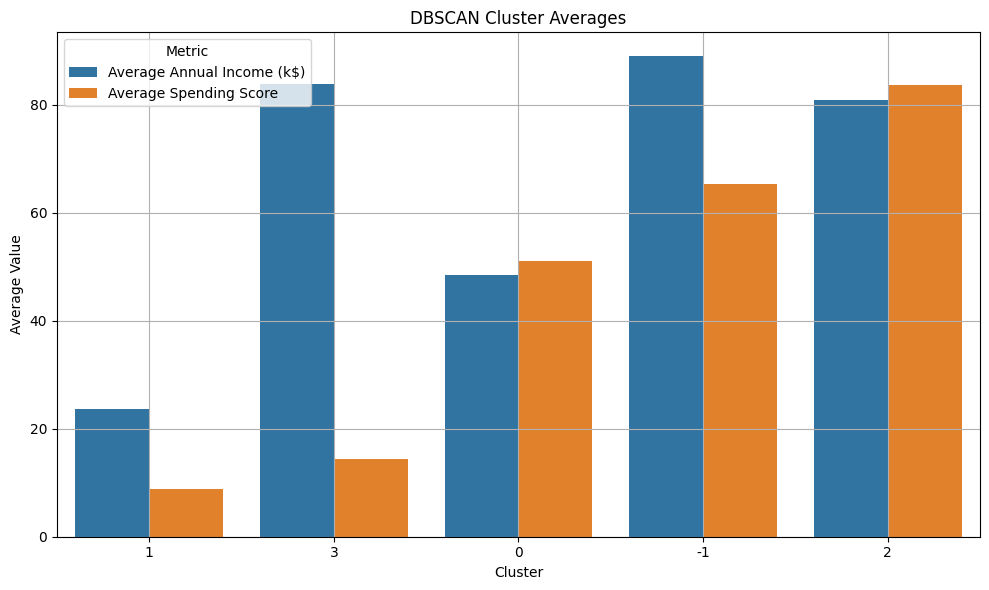

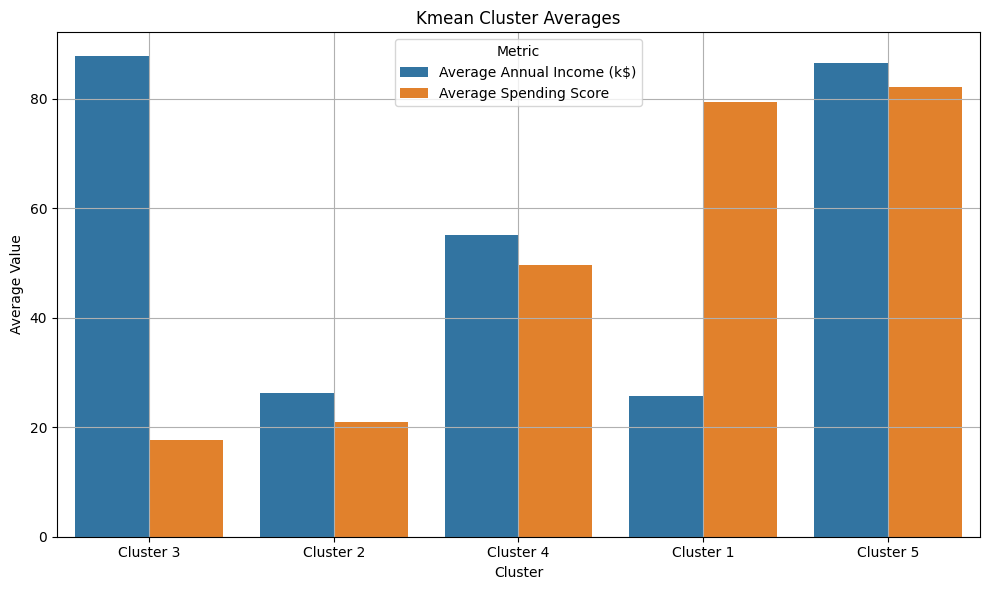

In [56]:
plot_cluster_averages(cluster_summary_dbscan, "DBSCAN")
plot_cluster_averages(cluster_summary_kmeans, "Kmean")


#**Helper Functions**
  
### **Custom Cluster Plotting and Centroid Initialization**  
This cell defines two helper functions:  
- `plot_clusters()` visualizes K-Means clustering results with colored data points and red "x" centroids.  
- `kMeans_init_centroids()` randomly selects K initial centroids from the dataset to customize K-Means initialization. These tools support experimentation with clustering behavior and visual analysis.


In [57]:
def plot_clusters(train_data_clean, predictions, centroids, i = 0):
  # Visualize the clusters and centroids
  plt.figure(figsize=(8, 6))
  plt.scatter(train_data_clean.iloc[:, 0], train_data_clean.iloc[:, 1], c=predictions, cmap='viridis', marker='o')
  plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='x', label='Centroids')

  plt.title('K-Means Clustering of Customer Data')
  if i != 0:
    plt.title('K-Means Clustering of Customer Data Model ' + str(i))
  plt.xlabel('Annual Income (k$) (Scaled)')
  plt.ylabel('Spending Score (1-100) (Scaled)')
  plt.legend()
  # plt.grid(True)
  plt.show()

def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be
    used in K-Means on the dataset X

    Args:
        X (ndarray): Data points
        K (int):     number of centroids/clusters

    Returns:
        centroids (ndarray): Initialized centroids
    """

    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])

    # Take the first K examples as centroids using .iloc
    centroids = X.iloc[randidx[:K]]

    return centroids

def plot_cluster_averages(cluster_summary, method_name):
    """
    Plots average feature values per cluster for a given clustering method.

    Args:
        cluster_summary (pd.DataFrame): DataFrame with 'Cluster' and average feature columns.
        method_name (str): Name of the clustering method (e.g., 'KMeans', 'DBSCAN').
    """
    # Sort clusters by average Spending Score
    sorted_clusters = cluster_summary.sort_values(by='Average Spending Score')['Cluster']

    # Melt the DataFrame for plotting
    melted = cluster_summary.melt(id_vars='Cluster', var_name='Metric', value_name='Average')

    # Ensure Cluster is treated as categorical with sorted order
    melted['Cluster'] = pd.Categorical(melted['Cluster'], categories=sorted_clusters, ordered=True)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=melted, x='Cluster', y='Average', hue='Metric')
    plt.title(f"{method_name} Cluster Averages")
    plt.xlabel("Cluster")
    plt.ylabel("Average Value")
    plt.legend(title="Metric")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
